### Exploratory Data Analysis of Data Collected on COVID-19 at ..... Hospital

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style="whitegrid")

In [3]:
# ingest data
df = pd.read_csv("keon_gran copy.csv")
df

,Year,Age,Sex,Suspected_cases,Confirmed_cases,Recovered_cases,Deaths,Cases_tested
0,2020,2-4,M,1,0,0,0,1
1,2020,2-4,F,0,1,0,0,0
2,2020,5-14,M,3,0,0,0,3
3,2020,5-14,F,2,0,0,0,2
4,2020,15-49,M,37,5,0,0,36
5,2020,15-49,F,37,5,0,1,36
6,2020,50-64,M,5,2,0,0,5
7,2020,50-64,F,3,1,0,0,3
8,2020,65-79,M,2,0,0,0,2
9,2020,65-79,F,2,0,0,0,2


In [3]:
# compute the total number of suspected cases
df.Suspected_cases.sum()

4000

In [4]:
# aggregate data by year
df_agg_yr = df.groupby(by="Year")[["Suspected_cases","Confirmed_cases","Deaths"]].sum().reset_index()
df_agg_yr["%_Confirmed_Suspected"] = 100*df_agg_yr["Confirmed_cases"]/df_agg_yr["Suspected_cases"]
df_agg_yr["%_Deaths_Confirmed"] = 100*df_agg_yr["Deaths"]/df_agg_yr["Confirmed_cases"]
df_agg_yr

,Year,Suspected_cases,Confirmed_cases,Deaths,%_Confirmed_Suspected,%_Deaths_Confirmed
0,2020,93,15,1,16.129032,6.666667
1,2021,3254,1001,8,30.762139,0.799201
2,2022,653,96,5,14.701378,5.208333


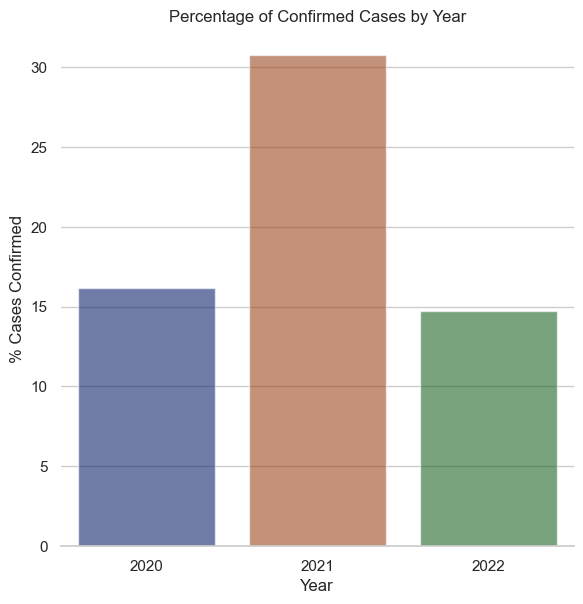

In [5]:
# visualize how % confirmed cases varies by year
g = sns.catplot(
    data=df_agg_yr, kind="bar",
    x="Year", y="%_Confirmed_Suspected",
    errorbar="sd", palette="dark", alpha=.6, height=6
).set(title="Percentage of Confirmed Cases by Year")
g.despine(left=True)
g.set_axis_labels("Year", "% Cases Confirmed")
plt.show()

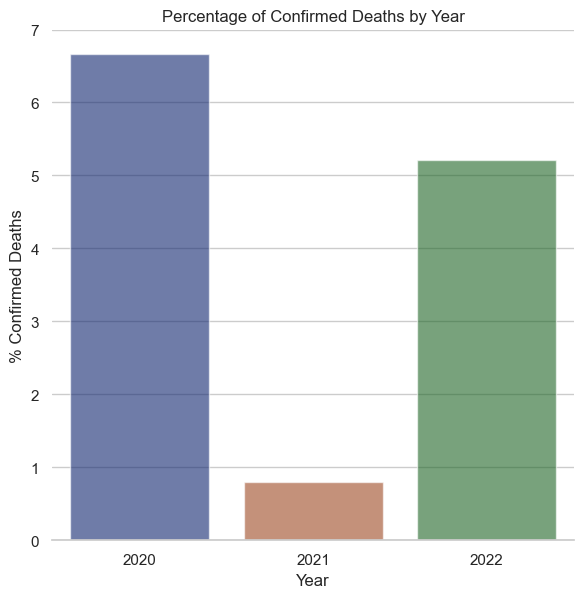

In [6]:
# visualize how % deaths varies by year
g = sns.catplot(
    data=df_agg_yr, kind="bar",
    x="Year", y="%_Deaths_Confirmed",
    errorbar="sd", palette="dark", alpha=.6, height=6
).set(title="Percentage of Confirmed Deaths by Year")
g.despine(left=True)
g.set_axis_labels("Year", "% Confirmed Deaths")
plt.show()

In [7]:
# aggregate data by age
df_agg_age = df.groupby(by="Age")[["Suspected_cases","Confirmed_cases","Deaths"]].sum().reset_index()
df_agg_age["%_Deaths_Confirmed"] = 100*df_agg_age["Deaths"]/df_agg_age["Confirmed_cases"]
df_agg_age["%_Confirmed"] = 100*df_agg_age["Confirmed_cases"]/df_agg_age["Suspected_cases"]
df_agg_age

,Age,Suspected_cases,Confirmed_cases,Deaths,%_Deaths_Confirmed,%_Confirmed
0,0-1,39,6,0,0.000000,15.384615
1,15-49,2733,776,4,0.515464,28.393707
2,2-4,87,14,0,0.000000,16.091954
3,5-14,241,50,0,0.000000,20.746888
4,50-64,529,157,4,2.547771,29.678639
5,65-79,283,76,2,2.631579,26.855124
6,80+,88,33,4,12.121212,37.500000


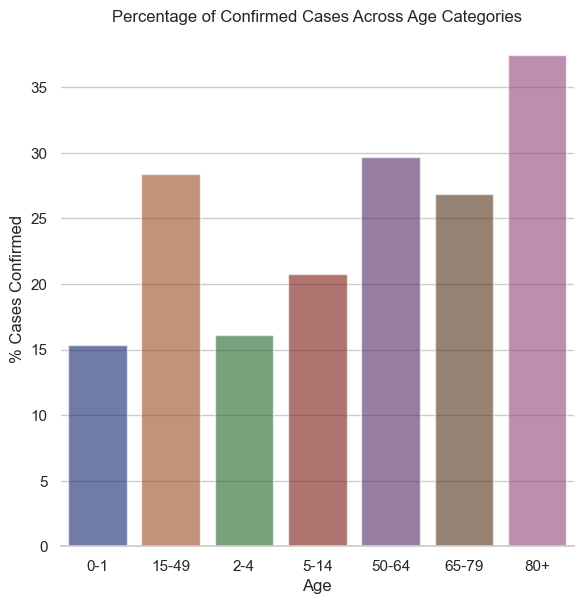

In [8]:
# visualize how % confirmed case varies across age categories
g = sns.catplot(
    data=df_agg_age, kind="bar",
    x="Age", y="%_Confirmed",
    errorbar="sd", palette="dark", alpha=.6, height=6
).set(title="Percentage of Confirmed Cases Across Age Categories")
g.despine(left=True)
g.set_axis_labels("Age", "% Cases Confirmed")
plt.show()

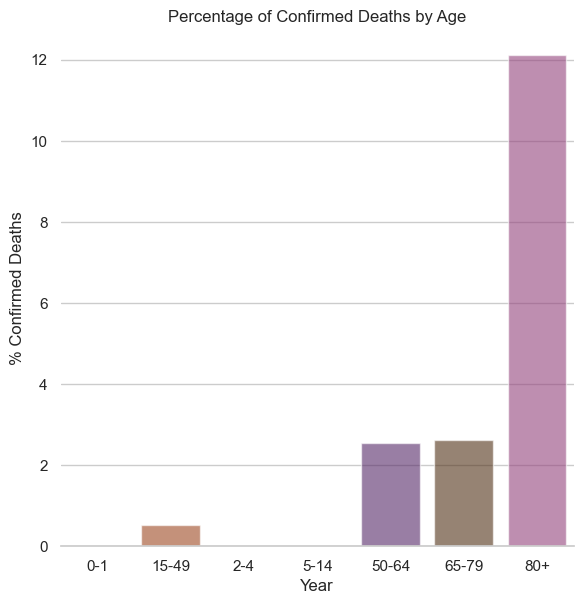

In [9]:
# visualize how % deaths varies across ages
g = sns.catplot(
    data=df_agg_age, kind="bar",
    x="Age", y="%_Deaths_Confirmed",
    errorbar="sd", palette="dark", alpha=.6, height=6
).set(title="Percentage of Confirmed Deaths by Age")
g.despine(left=True)
g.set_axis_labels("Year", "% Confirmed Deaths")
plt.show()

In [10]:
# aggregate data by sex
df_agg_sex = df.groupby(by="Sex")[["Suspected_cases","Confirmed_cases","Deaths"]].sum().reset_index()
df_agg_sex["%_Deaths_Confirmed"] = 100*df_agg_sex["Deaths"]/df_agg_sex["Confirmed_cases"]
df_agg_sex["%_Confirmed"] = 100*df_agg_sex["Confirmed_cases"]/df_agg_sex["Suspected_cases"]
df_agg_sex

,Sex,Suspected_cases,Confirmed_cases,Deaths,%_Deaths_Confirmed,%_Confirmed
0,F,2204,619,7,1.130856,28.085299
1,M,1796,493,7,1.419878,27.449889


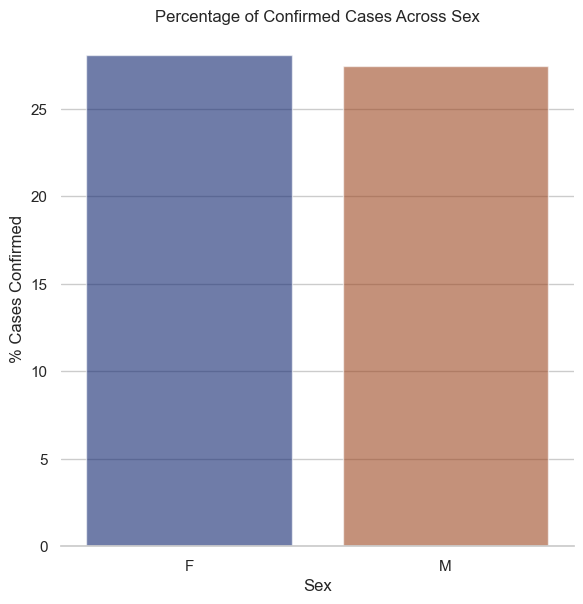

In [11]:
# visualize how % confirmed case varies across age categories
g = sns.catplot(
    data=df_agg_sex, kind="bar",
    x="Sex", y="%_Confirmed",
    errorbar="sd", palette="dark", alpha=.6, height=6
).set(title="Percentage of Confirmed Cases Across Sex")
g.despine(left=True)
g.set_axis_labels("Sex", "% Cases Confirmed")
plt.show()

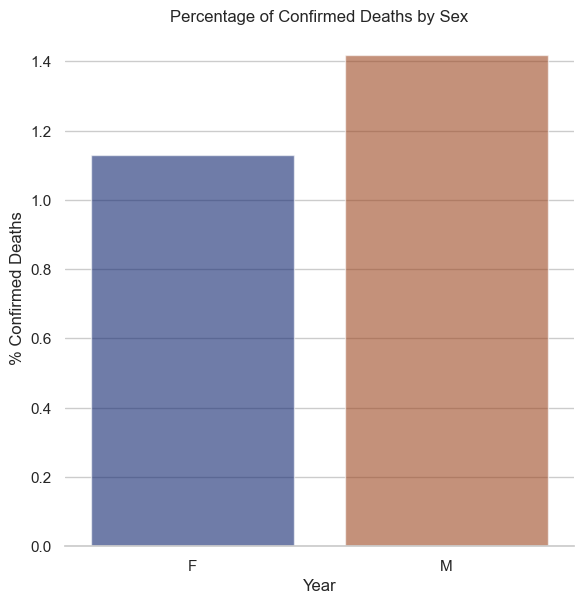

In [12]:
# visualize how % deaths varies across sex
g = sns.catplot(
    data=df_agg_sex, kind="bar",
    x="Sex", y="%_Deaths_Confirmed",
    errorbar="sd", palette="dark", alpha=.6, height=6
).set(title="Percentage of Confirmed Deaths by Sex")
g.despine(left=True)
g.set_axis_labels("Year", "% Confirmed Deaths")
plt.show()

In [13]:
# aggregate year and age
df_agg_yr_age = df.groupby(by=["Year","Age"])[["Suspected_cases","Confirmed_cases","Deaths"]].sum().reset_index()
df_agg_yr_age["%_Deaths_Confirmed"] = 100*df_agg_yr_age["Deaths"]/df_agg_yr_age["Confirmed_cases"]
df_agg_yr_age["%_Confirmed"] = 100*df_agg_yr_age["Confirmed_cases"]/df_agg_yr_age["Suspected_cases"]
df_agg_yr_age

,Year,Age,Suspected_cases,Confirmed_cases,Deaths,%_Deaths_Confirmed,%_Confirmed
0,2020,15-49,74,10,1,10.000000,13.513514
1,2020,2-4,1,1,0,0.000000,100.000000
2,2020,5-14,5,0,0,NaN,0.000000
3,2020,50-64,8,3,0,0.000000,37.500000
4,2020,65-79,4,0,0,NaN,0.000000
5,2020,80+,1,1,0,0.000000,100.000000
6,2021,0-1,33,5,0,0.000000,15.151515
7,2021,15-49,2199,693,2,0.288600,31.514325
8,2021,2-4,69,12,0,0.000000,17.391304
9,2021,5-14,194,44,0,0.000000,22.680412


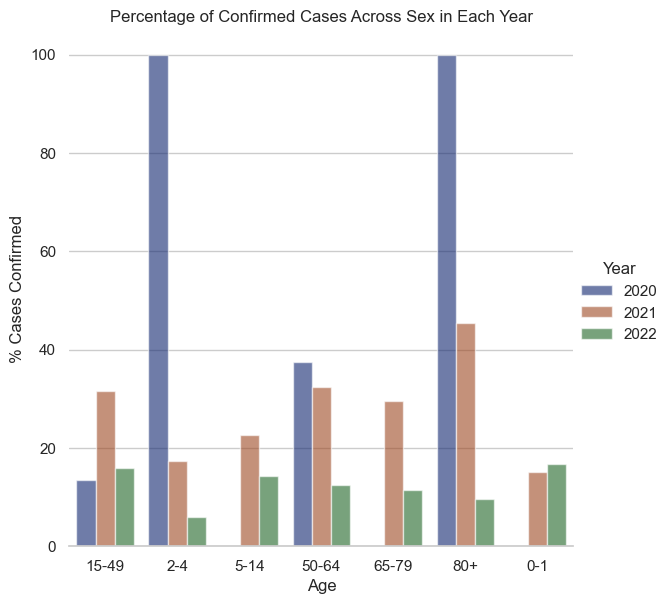

In [14]:
# visualize how % confirmed case varies across age categories
g = sns.catplot(
    data=df_agg_yr_age, kind="bar",
    x="Age", y="%_Confirmed", hue="Year",
    errorbar="sd", palette="dark", alpha=.6, height=6
).set(title="Percentage of Confirmed Cases Across Sex in Each Year")
g.despine(left=True)
g.set_axis_labels("Age", "% Cases Confirmed")
plt.show()

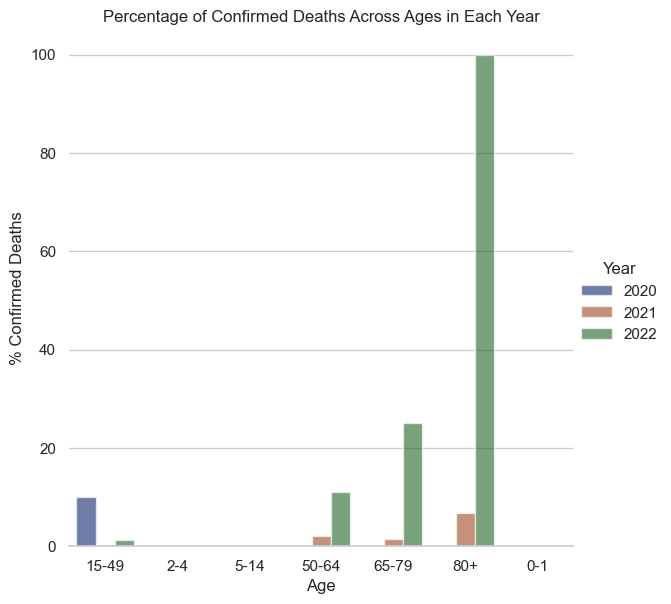

In [15]:
# visualize how % deaths varies across sex
g = sns.catplot(
    data=df_agg_yr_age, kind="bar",
    x="Age", y="%_Deaths_Confirmed", hue="Year",
    errorbar="sd", palette="dark", alpha=.6, height=6
).set(title="Percentage of Confirmed Deaths Across Ages in Each Year")
g.despine(left=True)
g.set_axis_labels("Age", "% Confirmed Deaths")
plt.show()